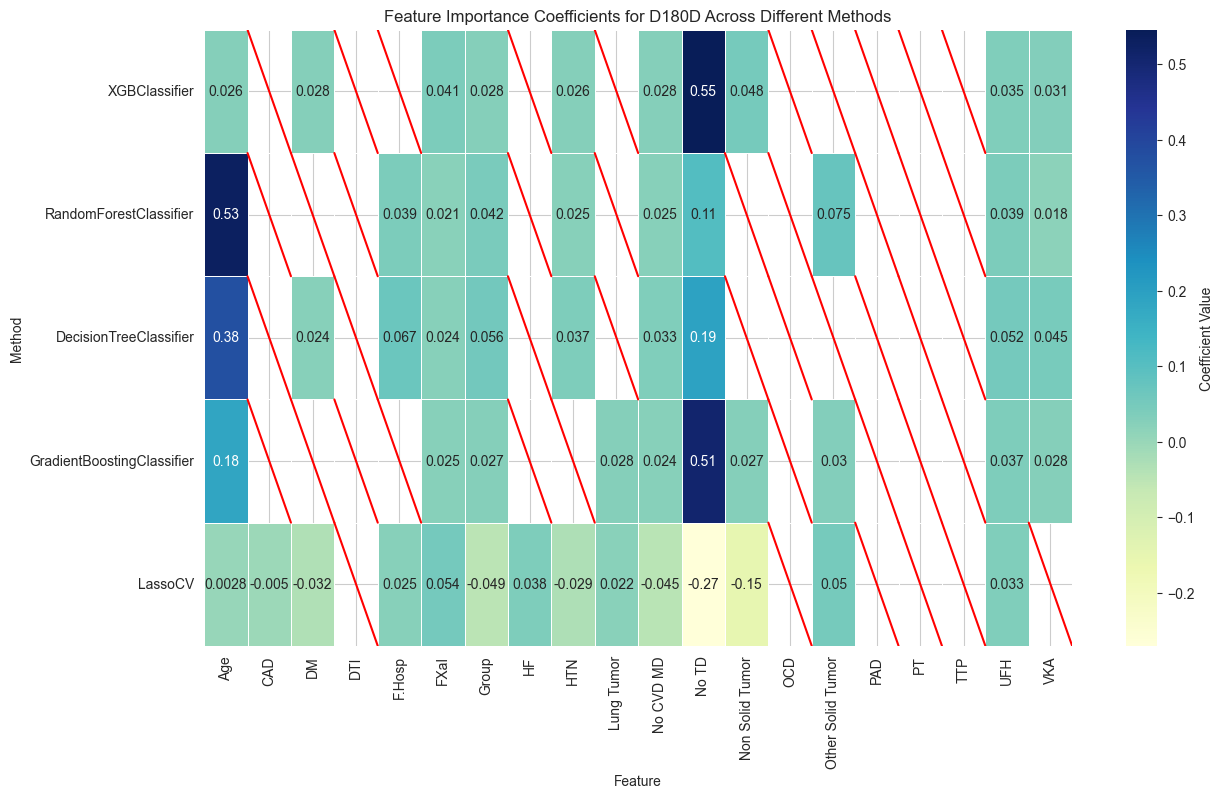

In [1]:
import pandas as pd

# 读取C:\MyProject\MIMIC-IPE\results\final_re\特征重要性1.xlsx
df1 = pd.read_excel('C:\\MyProject\\MIMIC-IPE\\results\\final_re\\特征重要性1.xlsx', sheet_name='XGBClassifier')
df2 = pd.read_excel('C:\\MyProject\\MIMIC-IPE\\results\\final_re\\特征重要性1.xlsx', sheet_name='RandomForestClassifier')
df3 = pd.read_excel('C:\\MyProject\\MIMIC-IPE\\results\\final_re\\特征重要性1.xlsx', sheet_name='DecisionTreeClassifier')
df4 = pd.read_excel('C:\\MyProject\\MIMIC-IPE\\results\\final_re\\特征重要性1.xlsx', sheet_name='GradientBoostingClassifier')
df5 = pd.read_excel('C:\\MyProject\\MIMIC-IPE\\results\\final_re\\特征重要性1.xlsx', sheet_name='LassoCV')
# Unnamed: 0列重命名为Feature
df1.rename(columns={'Unnamed: 0': 'Feature'}, inplace=True)
df2.rename(columns={'Unnamed: 0': 'Feature'}, inplace=True)
df3.rename(columns={'Unnamed: 0': 'Feature'}, inplace=True)
df4.rename(columns={'Unnamed: 0': 'Feature'}, inplace=True)
df5.rename(columns={'Unnamed: 0': 'Feature'}, inplace=True)
# 5个df均设置Feature列为索引
df1.set_index('Feature', inplace=True)
df2.set_index('Feature', inplace=True)
df3.set_index('Feature', inplace=True)
df4.set_index('Feature', inplace=True)
df5.set_index('Feature', inplace=True)
# 更改每个df中列名，y1改为D180D，y2改为D90D，y3改为D60D，y4改为D31D
df1.rename(columns={'y1': 'D180D'}, inplace=True)
df1.rename(columns={'y2': 'D90D'}, inplace=True)
df1.rename(columns={'y3': 'D60D'}, inplace=True)
df1.rename(columns={'y4': 'D31D'}, inplace=True)
df2.rename(columns={'y1': 'D180D'}, inplace=True)
df2.rename(columns={'y2': 'D90D'}, inplace=True)
df2.rename(columns={'y3': 'D60D'}, inplace=True)
df2.rename(columns={'y4': 'D31D'}, inplace=True)
df3.rename(columns={'y1': 'D180D'}, inplace=True)
df3.rename(columns={'y2': 'D90D'}, inplace=True)
df3.rename(columns={'y3': 'D60D'}, inplace=True)
df3.rename(columns={'y4': 'D31D'}, inplace=True)
df4.rename(columns={'y1': 'D180D'}, inplace=True)
df4.rename(columns={'y2': 'D90D'}, inplace=True)
df4.rename(columns={'y3': 'D60D'}, inplace=True)
df4.rename(columns={'y4': 'D31D'}, inplace=True)
df5.rename(columns={'y1': 'D180D'}, inplace=True)
df5.rename(columns={'y2': 'D90D'}, inplace=True)
df5.rename(columns={'y3': 'D60D'}, inplace=True)
df5.rename(columns={'y4': 'D31D'}, inplace=True)
# 将列的顺序改为D31D，D60D，D90D，D180D
df1 = df1[['D31D', 'D60D', 'D90D', 'D180D']]
df2 = df2[['D31D', 'D60D', 'D90D', 'D180D']]
df3 = df3[['D31D', 'D60D', 'D90D', 'D180D']]
df4 = df4[['D31D', 'D60D', 'D90D', 'D180D']]
df5 = df5[['D31D', 'D60D', 'D90D', 'D180D']]
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.lines import Line2D

# Extract D180D data from each dataframe
D180D_data = {'XGBClassifier': df1['D180D'], 'RandomForestClassifier': df2['D180D'],
              'DecisionTreeClassifier': df3['D180D'], 'GradientBoostingClassifier': df4['D180D'],
              'LassoCV': df5['D180D']}

# Create a DataFrame to hold D180D data from all methods
D180D_combined_df = pd.DataFrame(D180D_data)

# Transpose the DataFrame for better visualization
D180D_combined_df_t = D180D_combined_df.transpose()

# Plot the data
fig, ax = plt.subplots(figsize=(14, 8))
sns.heatmap(D180D_combined_df_t, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Coefficient Value'}, linewidths=.5, ax=ax)

# Draw a red line on NaN cells
for i in range(D180D_combined_df_t.shape[0]):
    for j in range(D180D_combined_df_t.shape[1]):
        if np.isnan(D180D_combined_df_t.iloc[i, j]):
            ax.add_line(Line2D([j, j+1], [i, i+1], color='red'))

# Set plot labels and title
plt.title('Feature Importance Coefficients for D180D Across Different Methods')
plt.xlabel('Feature')
plt.ylabel('Method')

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()
topsis_df = pd.DataFrame()
# topsis_df取D180D_combined_df的索引
#topsis_df = D180D_combined_df.index.to_frame()
D180D_combined_df = D180D_combined_df.abs()

# Replace NaN values with 0
D180D_combined_df_filled = D180D_combined_df.fillna(0)
from sklearn.preprocessing import StandardScaler
# 创建标准化对象
scaler = StandardScaler()
# 对D180D_combined_df进行标准化
D180D_combined_df_scaled = pd.DataFrame(scaler.fit_transform(D180D_combined_df), 
                                        columns=D180D_combined_df.columns, 
                                        index=D180D_combined_df.index)

# 计算每个特征的均值系数
topsis_df['mean_coef'] = D180D_combined_df_scaled.mean(axis=1)

# 计算特征被选中的次数
topsis_df['selected_count'] = D180D_combined_df.notna().sum(axis=1)


方法二：TOPSIS法
标准化特征的均值系数和被选中次数。
计算每个特征到理想解（最高值）和反理想解（最低值）的距离。
根据距离计算每个特征的相对接近度，值越大越好。

###### TOPSIS法（Technique for Order Preference by Similarity to Ideal Solution）是一种多准则决策方法，其核心思想是通过比较各备选方案与理想解和反理想解的相对距离来进行排序和选择。具体而言，TOPSIS法首先对各指标进行标准化处理，以消除量纲的影响；然后计算每个备选方案到理想解和反理想解的欧几里得距离；最后，通过计算各方案相对于理想解的相对接近度，得到综合评价值，从而对各方案进行排序。TOPSIS法的优势在于其简明易懂，能够同时考虑各指标的最优和最差情况，且不需要对指标权重进行显式分配，适用于多种决策场景中的综合评价和优选问题。

Top 10 features based on relative closeness:
['No TD', 'Age', 'Non Solid Tumor', 'Other Solid Tumor', 'Group', 'UFH', 'HF', 'FXaI', 'No CVD MD', 'F.Hosp']


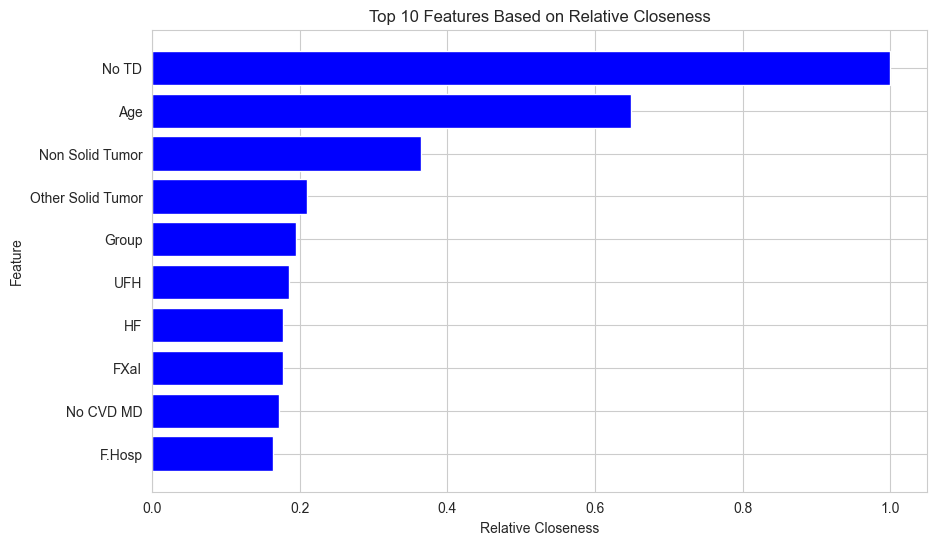

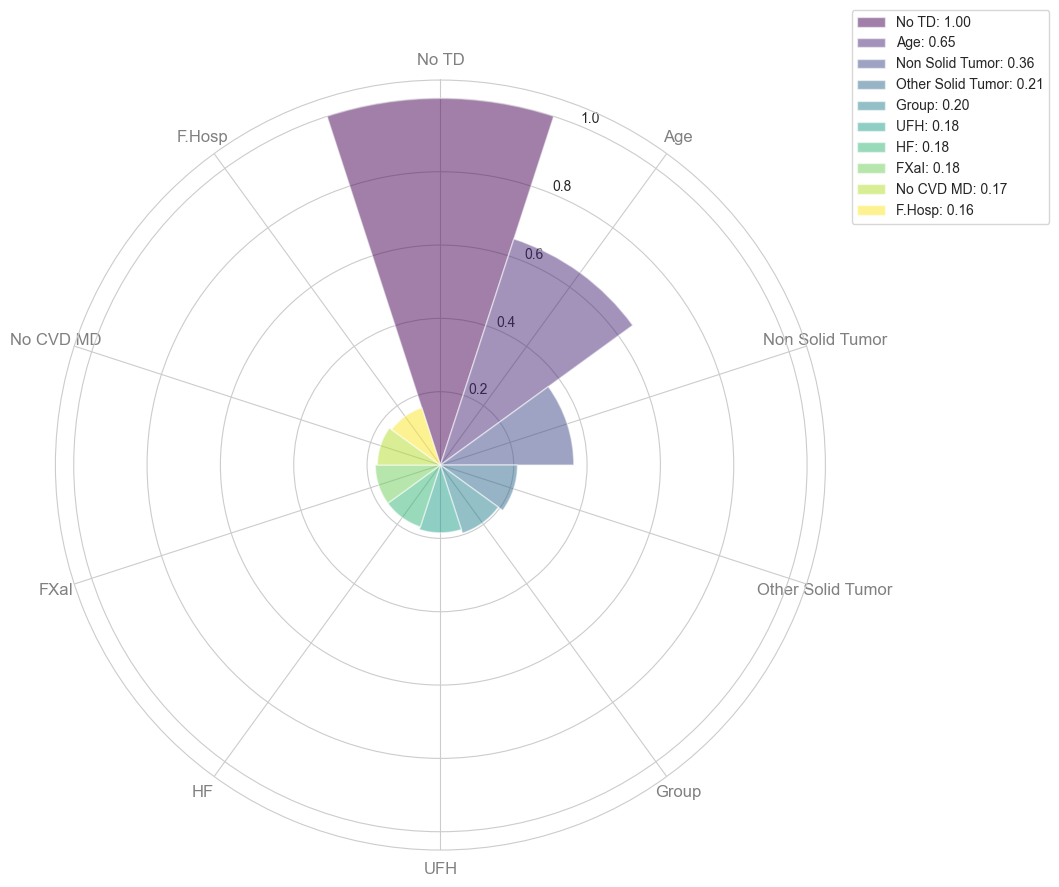

In [21]:
import numpy as np
# 1. 计算特征的均值系数
# 将每个特征在5种特征选择方法中的系数绝对值相加，然后除以5，获得均值。
# 1. 使用原始的 mean_coef 和标准化的 selected_count
topsis_df['selected_count_norm'] = topsis_df['selected_count'] / np.sqrt((topsis_df['selected_count'] ** 2).sum())

# 2. 理想解和反理想解
ideal_solution = [topsis_df['mean_coef'].max(), topsis_df['selected_count_norm'].max()]
anti_ideal_solution = [topsis_df['mean_coef'].min(), topsis_df['selected_count_norm'].min()]

# 3. 计算每个特征到理想解和反理想解的距离
topsis_df['distance_to_ideal'] = np.sqrt((topsis_df['mean_coef'] - ideal_solution[0]) ** 2 + (topsis_df['selected_count_norm'] - ideal_solution[1]) ** 2)
topsis_df['distance_to_anti_ideal'] = np.sqrt((topsis_df['mean_coef'] - anti_ideal_solution[0]) ** 2 + (topsis_df['selected_count_norm'] - anti_ideal_solution[1]) ** 2)
# 4. 计算相对接近度
topsis_df['relative_closeness'] = topsis_df['distance_to_anti_ideal'] / (topsis_df['distance_to_ideal'] + topsis_df['distance_to_anti_ideal'])

# 5. 根据相对接近度从大到小排序
topsis_df_sorted = topsis_df.sort_values(by='relative_closeness', ascending=False)

# 选择前10个特征
top_10_features = topsis_df_sorted.head(10).index.tolist()

# 打印结果
print("Top 10 features based on relative closeness:")
print(top_10_features)

import matplotlib.pyplot as plt

# 假设 topsis_df_sorted 是按照 relative_closeness 排序的 DataFrame

# 创建一个新的 DataFrame，只包含 relative_closeness 最高的前10个特征
top_10_relative_closeness = topsis_df_sorted['relative_closeness'].head(10)

# 创建水平条形图
plt.figure(figsize=(10, 6))
plt.barh(top_10_relative_closeness.index, top_10_relative_closeness.values, color='blue')
plt.xlabel('Relative Closeness')
plt.ylabel('Feature')
plt.title('Top 10 Features Based on Relative Closeness')
plt.gca().invert_yaxis()  # Invert y axis to have the feature with the highest relative closeness at the top
plt.show()

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 设置学术风格配色
sns.set_style("whitegrid")

# 提取前10个特征的'relative_closeness'数据
top_10_features_df = topsis_df_sorted[['relative_closeness']].head(10)

# 设置每个特征的角度为相等的
angles = np.linspace(0, 2 * np.pi, len(top_10_features_df), endpoint=False)

# 计算每个扇形的半径
radii = top_10_features_df['relative_closeness'].values

# 创建南丁格尔玫瑰图
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# 创建颜色列表
colors = plt.cm.viridis(np.linspace(0, 1, len(angles)))

# 绘制每个扇面
for i in range(len(angles)):
    ax.bar(angles[i], radii[i], width=2 * np.pi / len(top_10_features_df), color=colors[i], alpha=0.5)

# 设置图形的角度
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# 添加特征标签
ax.set_xticks(angles)
ax.set_xticklabels(top_10_features_df.index, color='grey', size=12)

# 添加图例
legend_labels = [f"{feature}: {radius:.2f}" for feature, radius in zip(top_10_features_df.index, radii)]
ax.legend(legend_labels, loc='upper right', bbox_to_anchor=(1.3, 1.1))

# 添加标题
# plt.title('Nightingale Rose Chart of Top 10 Features Based on Relative Closeness', size=20, color='blue', y=1.1)

# 显示图表
plt.show()

方法三：基于多准则决策（MCDM）
标准化特征的均值系数和被选中次数。
给每个指标分配一定权重。
计算每个特征的综合得分，并进行排序。

方法四：加权和得分法（隐式权重）
计算每个特征的均值系数和被选中次数。
将两个指标标准化。
计算综合得分：
将标准化后的均值系数和被选中次数相加，得到综合得分。
根据综合得分进行排序。

方法五：基于主成分分析（PCA）
计算每个特征的均值系数和被选中次数。
将两个指标标准化。
使用PCA将两个标准化指标降维为一个综合指标。
根据综合指标进行排序。